# cifar100 데이터셋 학습 (to do)

CIFAR-100 데이터셋은 총 100개의 label로 이루어진 이미지 분류를 위한 데이터셋이다.

각각의 레이블마다 32×32 크기 이미지인 50,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 60,000개의 32×32 크기의 이미지로 데이터셋이 구성되어 있다.

## (1) 데이터셋 준비

In [1]:
from keras.utils import np_utils
from keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar100.load_data()
print(X_train.shape, Y_train.shape)

(50000, 32, 32, 3) (50000, 1)


label :  [19]


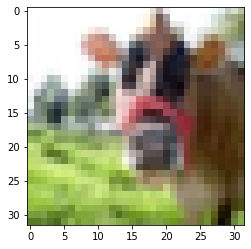

In [3]:
print('label : ',Y_train[0])
plt.imshow(X_train[0])

In [4]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(50000, 32, 32, 3) (50000, 100)


## (2) 모델링

In [6]:
from keras.applications import ResNet101

In [7]:
base_model = ResNet101(weights='imagenet', input_shape=(32,32,3), include_top=False)
# base_model = VGG16(weights=None, input_shape=(32,32,3), include_top=False)
base_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [8]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.layers import Flatten, BatchNormalization, Dropout, ReLU, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy

In [9]:
x = base_model.output
x = Flatten()(x)
# let's add a fully-connected layer
x = Dense(256, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(Y_train.shape[1], activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# first: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

## (3) 모델의 학습과정 설정

In [12]:
from keras import optimizers
optim = optimizers.Adam(lr=1e-3)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model on the new data for a few epochs

## (4) 모델 학습시키기

In [13]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10


KeyboardInterrupt: 

## (5) 모델 평가하기

In [20]:
loss= model.evaluate(X_test, Y_test, batch_size=20)
print('Loss : %.4f'%(loss[0]), 'Accuracy: %.4f'%(loss[1]*100))

10000/10000 [==============================] - 130s 13ms/step
Loss : 70.3127 Accuracy: 5.2700


## (6) 모델 사용하기

In [19]:
test_data = X_test[-1].reshape(1,32,32,3)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1])
plt.imshow(X_test[-1], cmap='gray')

ValueError: cannot reshape array of size 3072 into shape (1,32,32,1)